In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf


Load the MNIST dataset

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Visualize the dataset

Target labels:  [3 9 0 1 4 4 2 0 3 5]


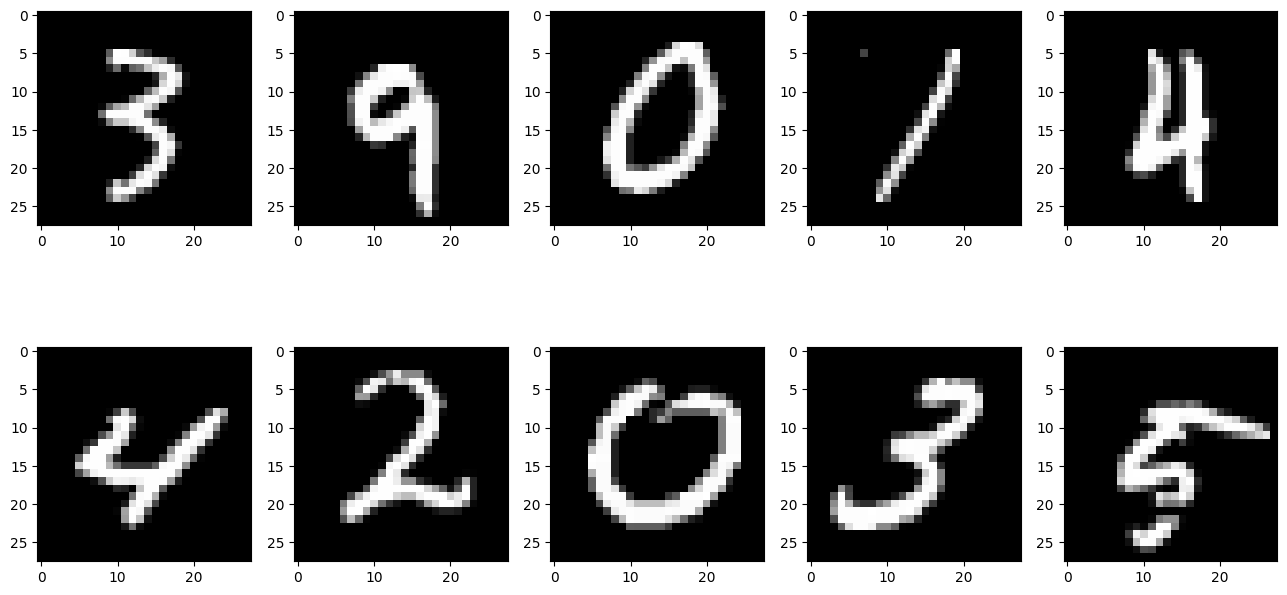

In [21]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [ ]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [ ]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(64,activation='relu'))
model.add(Dense(64,input_dim=64,activation='relu'))
model.add(Dense(32,input_dim=64,activation='relu'))
model.add(Dense(10,input_dim=32,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 56,810
Trainable params: 56,810
Non-trainable params: 0
_________________________________________________________________


Train the model

In [ ]:
train_info = model.fit(new_train_data , new_train_target , epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2909 - accuracy: 0.9139
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1296 - accuracy: 0.9605
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0936 - accuracy: 0.9713
Epoch 4/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0759 - accuracy: 0.9762
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0625 - accuracy: 0.9807
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0523 - accuracy: 0.9832
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0452 - accuracy: 0.9852
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0400 - accuracy: 0.9868
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0345 - accuracy: 0.9881
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.

Plot the loss and accuracy graphs

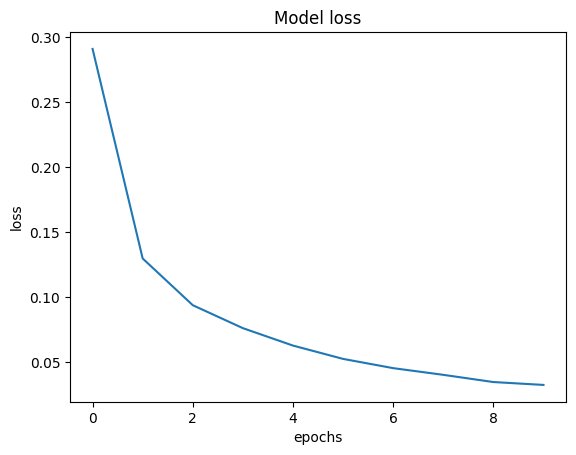

In [ ]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

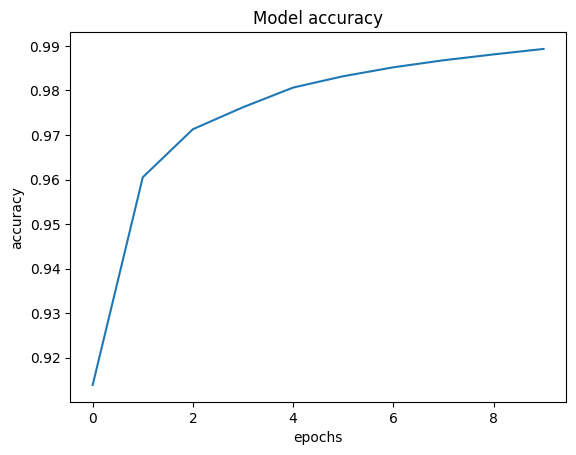

In [ ]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [ ]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 [==============================] - 2s 7ms/step - loss: 0.1096 - accuracy: 0.9697
Loss of the Test dataset is: 0.1096164658665657
Accuracy of the test dataset is: 0.9696999788284302


Save the model weights

In [ ]:
model.save_weights('MNIST_WEIGHTS_V1.h5')

###a. Improve the test accuracy of the model by changing the hyperparameters.

In [7]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
train_info = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.2)


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - accuracy: 0.8398 - loss: 0.5306 - val_accuracy: 0.9664 - val_loss: 0.1121
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9616 - loss: 0.1246 - val_accuracy: 0.9728 - val_loss: 0.0902
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9719 - loss: 0.0888 - val_accuracy: 0.9746 - val_loss: 0.0881
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.9786 - loss: 0.0667 - val_accuracy: 0.9752 - val_loss: 0.0857
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9827 - loss: 0.0548 - val_accuracy: 0.9745 - val_loss: 0.0974
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.9840 - loss: 0.0516 - val_accuracy: 0.9775 - val_loss: 0.0853
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.9867 - loss: 0.0411 - val_accuracy: 0.9759 - val_loss: 0.0963
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.9876 - loss: 0.0380 - va

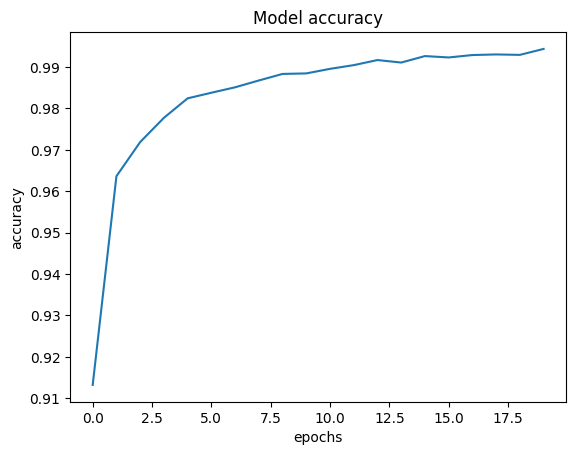

In [9]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()


In [14]:
# Save the model weights
model.save_weights('MNIST_WEIGHTS.weights.h5')


###b. Add L1 and L2 regularization terms to the model and retrain the model.

In [16]:
from tensorflow.keras.regularizers import l1_l2

In [17]:
# Build the model with L1 and L2 regularization
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(512, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
    Dropout(0.2),
    Dense(512, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
    Dropout(0.2),
    Dense(256, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
    Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
# Build the model with L1 and L2 regularization
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(512, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
    Dropout(0.2),
    Dense(512, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
    Dropout(0.2),
    Dense(256, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
    Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
    Dense(10, activation='softmax')
])

In [19]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:

# Train the model
train_info = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.2)


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.8337 - loss: 0.9282 - val_accuracy: 0.9617 - val_loss: 0.4443
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - accuracy: 0.9601 - loss: 0.4354 - val_accuracy: 0.9704 - val_loss: 0.3720
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.9706 - loss: 0.3611 - val_accuracy: 0.9726 - val_loss: 0.3317
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9756 - loss: 0.3088 - val_accuracy: 0.9713 - val_loss: 0.3099
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.9780 - loss: 0.2772 - val_accuracy: 0.9707 - val_loss: 0.2897
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.9790 - loss: 0.2582 - val_accuracy: 0.9728 - val_loss: 0.2683
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.9814 - loss: 0.2379 - val_accuracy: 0.9746 - val_loss: 0.2531
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9806 - loss: 0.2269 - 

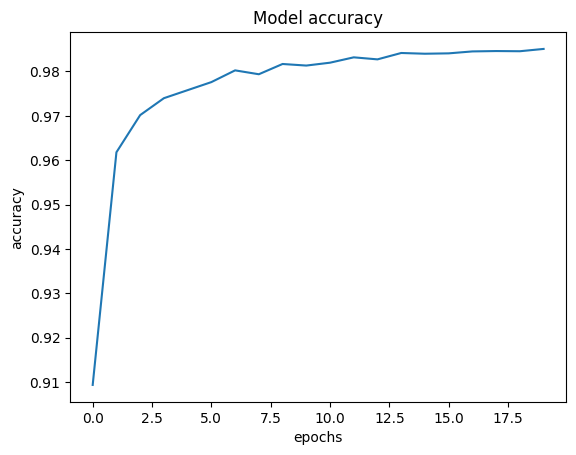

In [22]:
# Plot accuracy
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

In [23]:

# Evaluate the model
loss, acc = model.evaluate(x_test, y_test)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9756 - loss: 0.1905
Loss of the Test dataset is: 0.178926482796669
Accuracy of the test dataset is: 0.9793000221252441


In [24]:
# Save the model weights
model.save_weights('MNIST_WEIGHTS_with_L1_L2.weights.h5')

### c.Visualize class-wise test dataset performance using a confusion matrix.

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [26]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [27]:
# Train the model
train_info = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.2)


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.9844 - loss: 0.1498 - val_accuracy: 0.9786 - val_loss: 0.1787
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9859 - loss: 0.1413 - val_accuracy: 0.9808 - val_loss: 0.1700
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9868 - loss: 0.1410 - val_accuracy: 0.9778 - val_loss: 0.1788
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.9856 - loss: 0.1429 - val_accuracy: 0.9790 - val_loss: 0.1776
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.9873 - loss: 0.1402 - val_accuracy: 0.9781 - val_loss: 0.1776
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.9871 - loss: 0.1412 - val_accuracy: 0.9774 - val_loss: 0.1803
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9869 - loss: 0.1409 - val_accuracy: 0.9762 - val_loss: 0.1839
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9867 - loss: 0.1416 - 

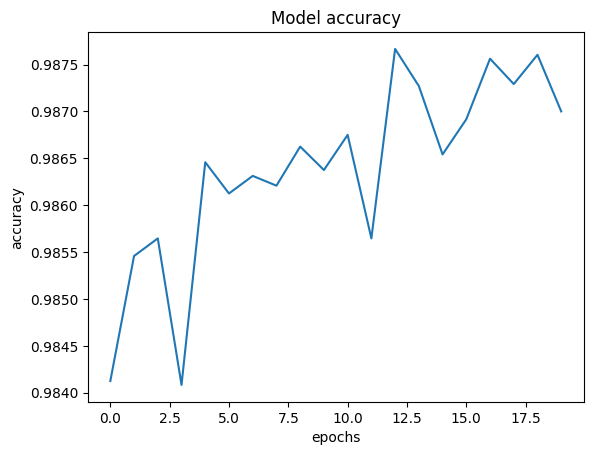

In [29]:
# Plot accuracy
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

In [30]:
# Evaluate the model
loss, acc = model.evaluate(x_test, y_test)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9741 - loss: 0.1889
Loss of the Test dataset is: 0.17040976881980896
Accuracy of the test dataset is: 0.9790999889373779


In [31]:
# Save the model weights
model.save_weights('MNIST_WEIGHTS_with_L1_L2.weights.h5')

In [32]:
# Predict the labels for the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [33]:

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))

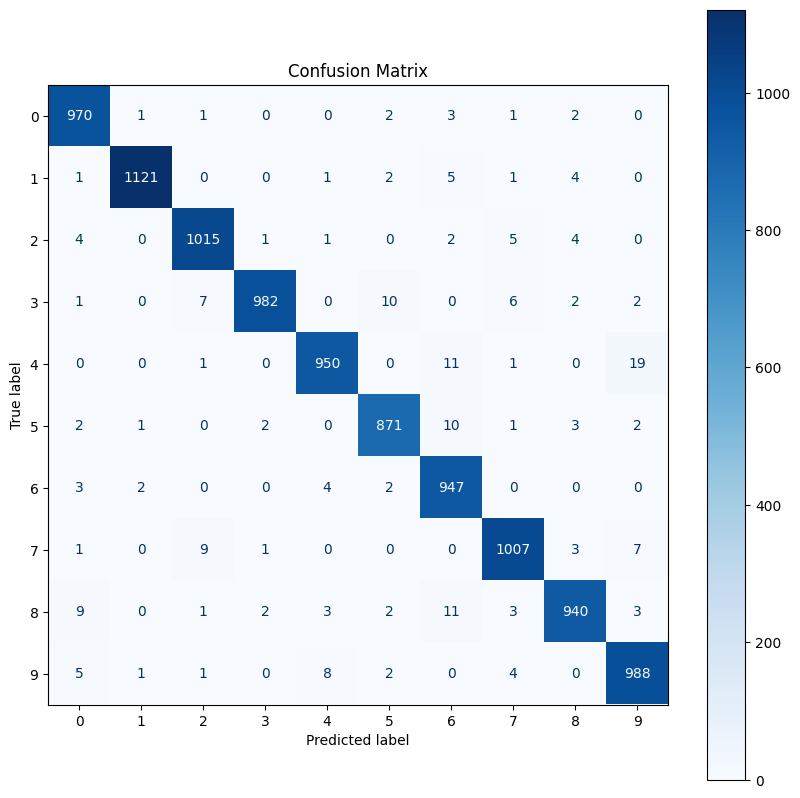

In [34]:
# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix')
plt.show()